In [ ]:
import scanpy as sc
from squidpy.gr.ppatterns import neighborhood_plot 

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
adata = sc.datasets.visium_sge(sample_id="V1_Mouse_Brain_Sagittal_Anterior")
adata.var_names_make_unique()
adata

In [4]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata, resolution = .1, key_added = "leiden")

         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/mohammad.lotfollahi/opt/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


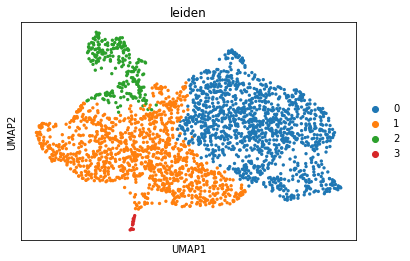

In [6]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"])

/Users/mohammad.lotfollahi/PycharmProjects/squidpy/squidpy/gr/ppatterns.py:261: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.add.at(co_occur, [rows_idx, cols_idx], 1)
/Users/mohammad.lotfollahi/PycharmProjects/squidpy/squidpy/gr/ppatterns.py:268: RuntimeWarning: invalid value encountered in true_divide
  df = df.append(pd.DataFrame({'label': features, 'ratio': probs_conditional / probs, 'distance': intervals[i]}))
/Users/mohammad.lotfollahi/PycharmProjects/squidpy/squidpy/gr/ppatterns.py:276: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticks(), size=10)


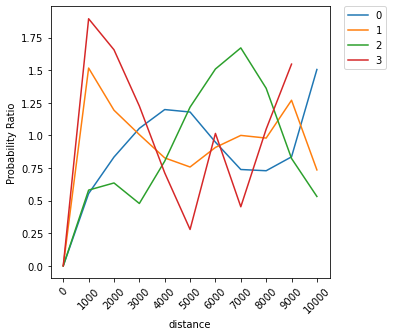

In [15]:
neighborhood_plot(adata=adata, spatial_key='spatial', cluster_key='leiden', condition_label='1', max_distance=10000, step=1000, figsize=(5,5))